In [10]:
with open ("test.tree") as f:
    tree = f.read()
    tree = tree.strip().split("\n")
    for i in range(len(tree)):
        tree[i] =  tree[i].strip().split()   

In [11]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

stack = []
G = nx.Graph()

for i in range(len(tree)):
    node = tree[i]
    level = len(node) - 1
    if level == 0:
        stack.append(node[-1]+str(i))
    else:
        if level > len(stack) - 1:
            G.add_edge(stack[-1],node[-1]+str(i))
            stack.append(node[-1]+str(i))
        else:
            while level <= len(stack) - 1:
                stack.pop()
            G.add_edge(stack[-1],node[-1]+str(i))
            stack.append(node[-1]+str(i))

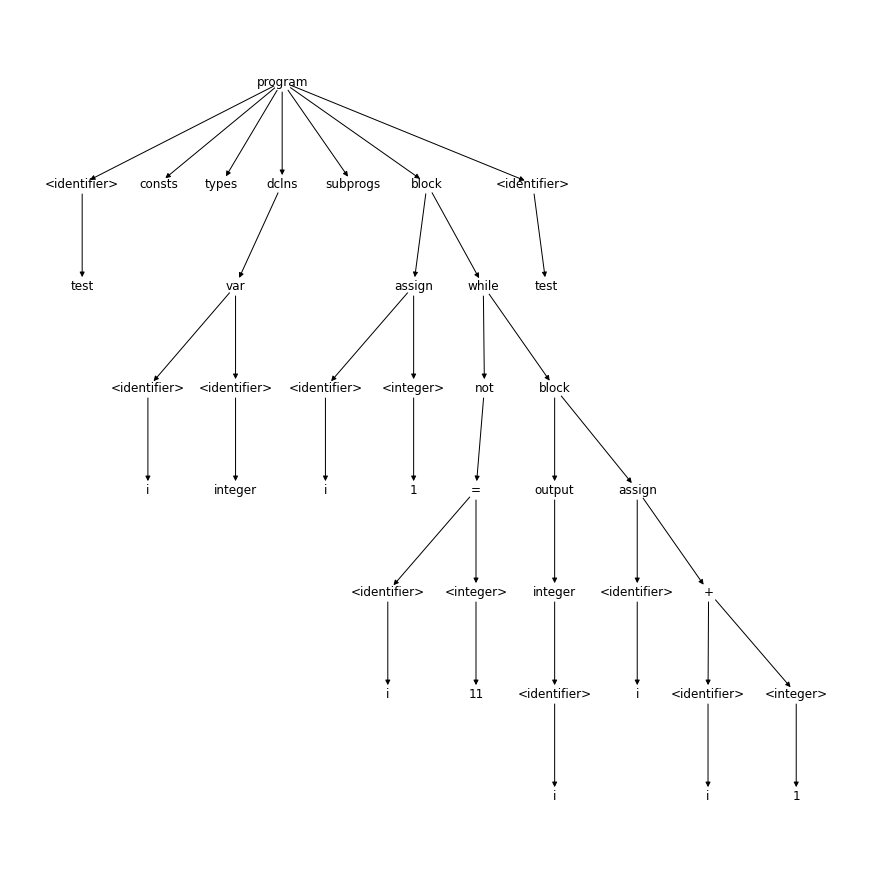

In [12]:
T = nx.bfs_tree(G, "program(7)0")

pos = graphviz_layout(T, prog="dot")

labels = {}    
for node in T.nodes():
    labels[node] = node.split("(")[0]
    
fig = plt.figure(figsize=(12,12))
nx.draw(T, pos, with_labels=False, node_color='w')
nx.draw_networkx_labels(T,pos,labels)
plt.show()